Loading vision model config from C:\Users\Aurora\AppData\Roaming\Python\Python310\site-packages\cn_clip\clip\model_configs\ViT-B-16.json
Loading text model config from C:\Users\Aurora\AppData\Roaming\Python\Python310\site-packages\cn_clip\clip\model_configs\RoBERTa-wwm-ext-base-chinese.json
Model info {'embed_dim': 512, 'image_resolution': 224, 'vision_layers': 12, 'vision_width': 768, 'vision_patch_size': 16, 'vocab_size': 21128, 'text_attention_probs_dropout_prob': 0.1, 'text_hidden_act': 'gelu', 'text_hidden_dropout_prob': 0.1, 'text_hidden_size': 768, 'text_initializer_range': 0.02, 'text_intermediate_size': 3072, 'text_max_position_embeddings': 512, 'text_num_attention_heads': 12, 'text_num_hidden_layers': 12, 'text_type_vocab_size': 2}
Enter the image filename: A:\学习\数据集\COCO\val2014\COCO_val2014_000000000772.jpg
Enter labels separated by commas: 绵羊，马，牛，狗，猪


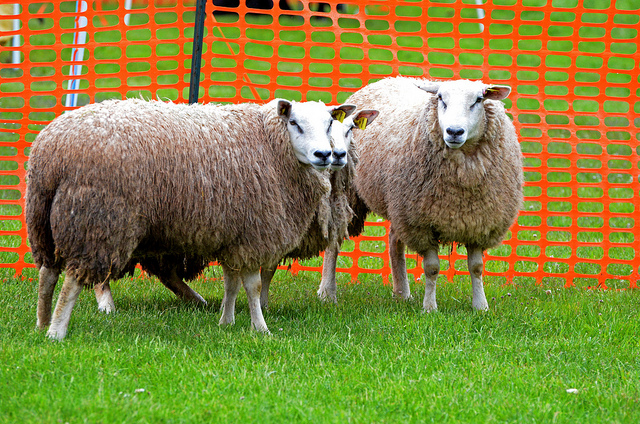

Label - Label Probability:
绵羊 - 0.9992650151
牛 - 0.0002887550
猪 - 0.0002201430
马 - 0.0001989176
狗 - 0.0000271584


In [4]:
import torch 
from PIL import Image
from IPython.display import display
import cn_clip.clip as clip
from cn_clip.clip import load_from_name, available_models

# print("Available models:", available_models())  

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = load_from_name("ViT-B-16", device=device, download_root='./')
model.eval()

# 获取用户输入的图片名称并加载图片
image_path = input("Enter the image filename: ")
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# 获取用户输入的标签列表并去除空格
user_labels = [label.strip() for label in input("Enter labels separated by commas: ").split('，')]
text = clip.tokenize(user_labels).to(device)

# 显示用户输入的图片
user_image = Image.open(image_path)
display(user_image)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True) 
    text_features /= text_features.norm(dim=-1, keepdim=True)    

    logits_per_image, logits_per_text = model.get_similarity(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# 对概率和标签进行递减排序并输出
sorted_results = sorted(zip(user_labels, probs[0]), key=lambda x: x[1], reverse=True)
print("Label - Label Probability:")
for label, prob in sorted_results:
    print(f"{label} - {prob:.10f}")
